Install Libraries and Prepare Data

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install numpy
%pip install xgboost


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('premier-player-23-24.csv', on_bad_lines='skip')

#Remove players with less than 15 appearances
data = data[data['MP'] >= 15]
data = data.reset_index(drop=True)

#Display the first few rows of the data
data.head()

Predict the Position

Accuracy: 0.80


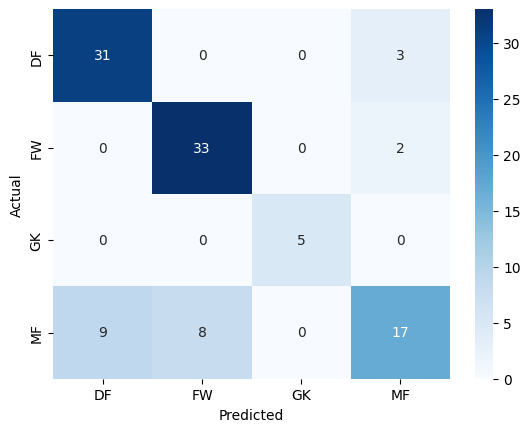

In [ ]:
#Feature and Target Selection
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

#features = [ "Ast", "G+A", "G-PK", "CrdR", "xG", "npxG", "xAG", "npxG+xAG", "PrgC", "PrgP", "PrgR", "Gls_90", "Ast_90", "G+A_90", "G-PK_90", "G+A-PK_90", "xG_90", "xAG_90", "xG+xAG_90", "npxG_90", "npxG+xAG_90"]
features = ["Gls", "PrgP", "G+A_90", "npxG_90", "G-PK_90", "PrgC", "npxG+xAG" ]
target = 'Pos'

#Split the data into training and testing sets
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Train a classification model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Display the accuracy of the model
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Replace the numbers in the confusion matrix plot with the position labels
cm = confusion_matrix(y_test, y_pred)
pos_labels = sorted(y.unique())
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=pos_labels, yticklabels=pos_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Predict Position Using Random Forest

Random Forest Accuracy: 0.71


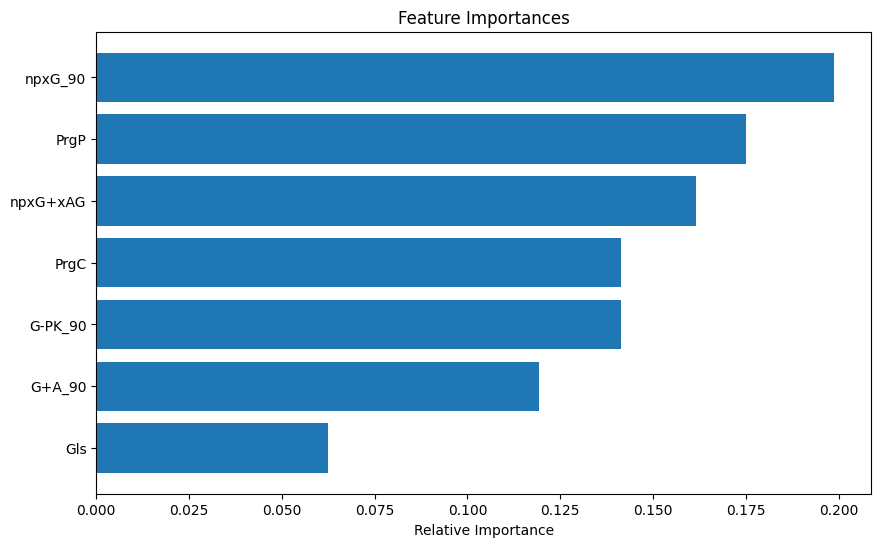

In [7]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Train a Random Forest Classifier for predicting position
features_clf = ["Gls", "PrgP", "G+A_90", "npxG_90", "G-PK_90", "PrgC", "npxG+xAG" ]
target_clf = 'Pos'

#Prepare data and split (define x_train/x_test here to avoid NameError)
x = data[features_clf]
y = data[target_clf]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Standardize features
scaler_rf = StandardScaler()
x_train = scaler_rf.fit_transform(x_train)
x_test = scaler_rf.transform(x_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

#Display the accuracy of the Random Forest model
rf_accuracy = rf_model.score(x_test, y_test)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

#Visualize feature importance
importances = rf_model.feature_importances_
feature_names = features_clf
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



Predict Position Using XG Boost

XGBoost Accuracy: 0.81


C:\Users\sidhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:199: UserWarning: [16:12:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


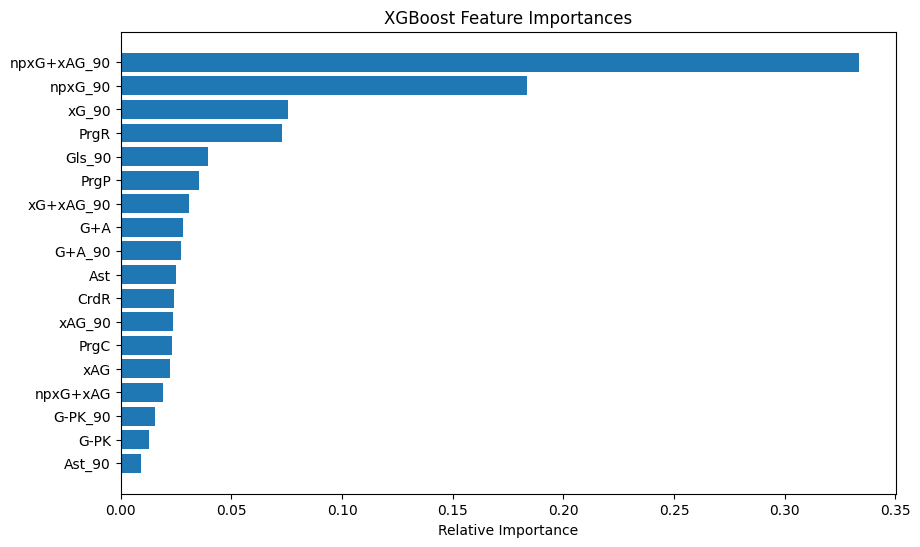

In [ ]:
#Import XGBoost classifier
from xgboost import XGBClassifier
#Train an XGBoost Classifier for predicting position
features_xgb = [ "Ast", "G+A", "G-PK", "CrdR", "xG", "xAG", "npxG+xAG", "PrgC", "PrgP", "PrgR", "Gls_90", "Ast_90", "G+A_90", "G-PK_90", "xG_90", "xAG_90", "xG+xAG_90", "npxG_90", "npxG+xAG_90"]
target_xgb = 'Pos'
#Prepare data and split
x = data[features_xgb]
y = data[target_xgb]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Assign Position labels to numerical values
position_mapping = {label: idx for idx, label in enumerate(sorted(y.unique()))}
y_train = y_train.map(position_mapping)
y_test = y_test.map(position_mapping)
#Standardize features
scaler_xgb = StandardScaler()
x_train = scaler_xgb.fit_transform(x_train)
x_test = scaler_xgb.transform(x_test)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
#Display the accuracy of the XGBoost model
xgb_accuracy = xgb_model.score(x_test, y_test)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')
#Visualize feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_feature_names = features_xgb
xgb_indices = np.argsort(xgb_importances)
plt.figure(figsize=(10, 6))
plt.title('XGBoost Feature Importances')
plt.barh(range(len(xgb_indices)), xgb_importances[xgb_indices], align='center')
plt.yticks(range(len(xgb_indices)), [xgb_feature_names[i] for i in xgb_indices])
plt.xlabel('Relative Importance')
plt.show()

Predict the Amount of Goals

Mean Squared Error: 3.80
R^2 Score: 0.81


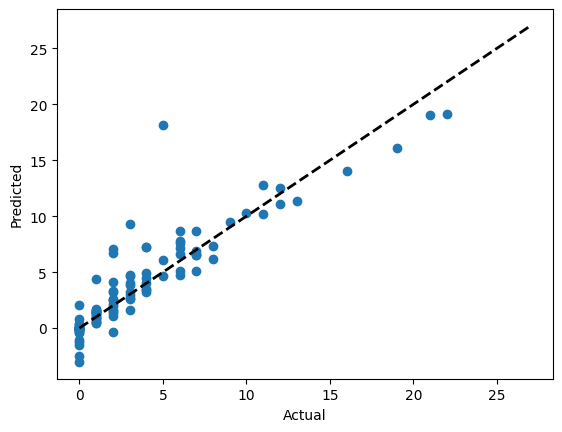

In [6]:
#Feature and Target Selection
features = ["Ast", "xG_90", "xAG_90", "G+A_90", "npxG_90", "npxG+xAG_90", "PrgC", "PrgP", "G-PK_90"]
target = 'Gls'

#Split the data into training and testing sets
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Train a regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Display the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

#Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()